# AI Fairness

Hold on to your data scientist hat but make room for your tester hat.  You'll need both for this section on AI/ML fairness. In these lessons and hands-on activities, you are going to learn how to assess ML models for fairness so that you can identify and quantify fairness-related risks, and employ strategies to mitigate them.  For the hands-on demos and exercises, you'll practice using data processing libraries like _pandas_ and _numpy_, along _seaborn_ for data visualization, to probe training data for fairness-related issues. You'll then get exposure to [Fairlearn](https://fairlearn.org/) and [AI Fairness 360](https://aif360.mybluemix.net/), open-source toolkits for measuring and mitigating fairness-related risks. Since testing is about risk and risk mitigation, the AI/ML and software testing worlds intersect quite naturally here.

## Introduction to AI Fairness

AI is everywhere and in many ways this is great. However, at the same time, the opportunities brought about by AI also raise new challenges. Some of these challenges have received much attention in the media, and have highlighted the need to "get AI right".  Fairness in AI is about making sure that machines do not discriminate against certain groups of people, and possibly place already disadvantaged groups at a further disadvantage.  AI fairness is a fundamentally sociotechnical challenge, meaning that it cannot be approached from purely social or purely technical perspectives. Taken together, these factors can make it a pretty daunting landscape to navigate. Although there are few easy answers, there are a variety of strategies emerging for assessing and mitigating fairness-related risks, as well as a deepening understanding of the challenge throughout society. This tutorial explores these issues and gives you practice using open-source fairness toolkits.

<img style="float: right; margin: 15px 15px 15px 15px;" src="img/fairnessnotlaw.png" width="350"/>

### Fairness Not Law

Fairness is related, but distinct from anti-discrimination law. In this training, legal terminology like: _discriminate against_, _protected class_, _disparate treatment_ and _disparate impact_ are avoided. Although fairness is related to the concepts in anti-discrimination law, the goal is to focus on fairness and not touch on the legal considerations. It is important to note that some fairness interventions could be illegal, and, conversely, there are AI systems that follow the law, including antidiscrimination law, but still exhibit fairness issues.

<img style="float: right; margin: 15px 15px 15px 15px;" src="img/biasintersection.png" width="270"/>

### Impacts and Risks Instead of Bias

If you’ve read anything about fairness in AI systems then you’ve probably seen the word _bias_ get thrown around. In it's textbook definition, **bias** is a systemic or disproportionate tendency toward something or someone. When it comes to AI, bias is often used as a _catch-all_ phrase for describing any unfair system behavior, or causes of that unfairness. This training avoids using the word bias whenever possible because the term is ambiguous. Bias means very different things to different communities. For example, there is statistical bias, social bias, and systemic bias to name a few.  However, most issues typically arise at the intersection of different types of bias.  For this reason, it is better to talk about the **impacts** or **risks** related to fairness in AI-based systems. Such terms are not only useful for referring to those who may be harmed by the system and in what ways, but also for describing assessment and mitigation strategies. 

### Debiasing? No Such Thing
I also want to emphasize that because there are so many different reasons why AI systems can cause fairness-related issues, it is not possible to completely remove bias from a system or guarantee its fairness. As a result, throughout this training you aren't likely to encounter terms like **debiasing** or **unbiased**, as they tend to set unrealistic expectations.

## Evaluating Fairness in AI and Machine Learning

The goal of evaluating fairness in AI/ML is to answer the questions:
* Are there groups of people who are disproportionately, negatively impacted by the system?
* If so, in what ways are they impacted and what can we do about it?

The steps in AI fairness validation are identifying risks or potential harm, determining which groups might be impacted, quantifying risks and comparing them across groups.

### Identifying Risks

There are three broad categories of fairness-related risks that can occur in ML models: **allocation risk**, **quality of service risk**, and **representation risk**.  Note that these are not mutually exclusive categories and therefore it is possible for a single AI system to exhibit more than one type of potentially harmful behavior.

#### Allocation Risk

This type of risk may occur when AI systems are used allocate opportunities or resources in ways that
can have significant negative impacts on people’s lives. For example, Amazon abandoned its automated hiring system after finding that it amplified the existing gender imbalance in the tech industry by withholding employment opportunities
from women.

#### Quality of Service Risk
Quality of service risk is about whether a system works as well for one person as it does for another. For example, researchers found that 3 commercial gender classifiers had higher error rates for images of women with darker skin tones, than for images of men with lighter skin tones. Like accessibility issues, quality of service risks can raise questions about respect, dignity, and personhood. Imagine how a user might feel if a system repeatedly fails to recognize her voice, but easily recognizes those of her peers?

#### Representation Risk
Representation risks include things like stereotyping, denigration, and any form of over- or under-representation. Denigration occurs when an AI system is itself part of a process that is actively derogatory, demeaning, or offensive. For example, Google Photos infamously mislabeled an image of Black people as _gorillas_. A similar scenario happened again a few years later when Facebook's AI labeled black men in a video as _primates_. This mislabeling is harmful not just because these system made the same mistake, but because the labels they applied have a history of being purposefully used to denigrate and demean Black people.


### Determining Impacted Groups

With potential fairness-related harms identified, it's time to determine who may be at risk of experiencing them. Many times it is the people who will use or operate the system, but somtimes it can be other stakeholders that are directly or indirectly impacted, either by choice or not. For example, in the case of a facial recognition system for workplace building access, the system operator is not the person whose face is being recognized and thus not the person who is most immediately harmed if the system makes a mistake.

#### Search for the Most Relevant Groups
Although news and media stories often focus on groups of people that are protected by antidiscrimination laws, such as groups defined in terms of race, gender, age, or disability status, there are actually many different groups of people that we want our systems to treat fairly and it’s not always easy to identify the most relevant ones, which can even be specific to the domain or use case. For example, in the case of an automated essay-grading system, whether someone is a native speaker of the language may be more relevant than their age or their disability status.

#### Carefully Examine Group Intersections
Remember that groups intersect and people at those intersections may be at risk of experiencing unique harms that might be obscured by considering only non-intersected groups. Returning to the image-based gender classifiers mentioned earlier, error rates were significantly higher for women with darker skin tones than for images of women overall, or for images of people with darker skin tones overall. The only way to discover those types of issues are consider the models' performance with respect to skin tone and gender at the same time.

### Quantifying Risks and Comparing Across Groups

Risk quantification is a well-studied subject and you can probably find many tools and resources to help you with this step. The two key components of risk are the **likelihood** (probability) that a given event occurs, and the **severity** of any negative impacts. A common practice for quantifying risks is to use a **risk assessment matrix**.  As shown in the matrix, if there is a high probablity that a risk, if realized, will have a sever impact, then that item should have the attention of the team.  In software testing, the idea behind **risk-based testing** is that you should spend more time validating those aspects of the system that pose the highest threat, and such a philosophy is definitely applicable to testing AI for fairness.

<img style="align: center; margin: 15px 15px 15px 15px;" src="img/riskmatrix.png" width="350"/>

Two critical decisions when desiging an AI system are

how we define the machine learning task
what dataset we use to train our models
These choices are often intertwined, because the dataset is often a convenience dataset, based on availability, which leads to a specific choice of label and performance metric (that's also the case in our scenario).

In this part of the tutorial, we first load the dataset, and then we examine it for a variety of fairness issues:

sample sizes of different demographic groups, and in particular different racial groups
appropriateness of our choice of label (readmission within 30 days)
representativeness/informativeness of different features for different groups
Besides dataset characteristics, one additional aspect of dataset fairness is whether the data was collected in a manner that respects the autonomy of individuals in the dataset.

## Context for Hands-On Activities

The hands-on interactive demonstrations, practices, and exercises in this notebook are all based on the information in this section. Although each hands-on practice builds on the previous, any required code sections have been replicated within each section so that they are all self-contained.

### Scenario

Consider an automated system for recommending patients for _high-risk care management_ programs.

> These programs seek to improve the care of patients with complex health needs by providing additional resources, including greater attention from trained providers, to help ensure that care is well coordinated. Because the programs are themselves expensive with costs going toward teams of dedicated nurses, extra primary care appointment slots, and other scarce resources — **the automated system will rely extensively on ML algorithms to identify patients who will benefit the most**.

### Model Development

The proposed automated system in the scenario will be implemented as an ML classification model.

> The purpose of the classifier is to predicts whether a patient should be suggested to their primary care physicians for enrollment into the care management program. A positive prediction will mean recommendation into the care program.  Since hospital **readmission within 30 days** can be viewed as a proxy that the patients needed more assistance at the release time, it has been selected as the label (output) the model will be trained to predict.

### Dataset

The dataset for this scenario is a [publicly available clinical dataset](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008).

>The data focuses on hospital re-admissions for _diabetic patients_ across 130 different hospitals in the U.S., recorded over a ten-year period. Each record represents a patient's readmission whose stay lasted one to fourteen days. The features describing each re-admission encounter include **demographics**, **diagnoses**, **diabetic medications**, **number of visits** in the preceding year, **payer information**, and whether the patient was **readmitted after release**, and if **readmission was within 30 days** of the release.

## Hands-On with Testing Fairness in Model Training: Sample Sizes

### Setup

#### Import and Configure Libraries

In [1]:
# Data Processing: numpy, pandas

import numpy as np
import pandas as pd
pd.set_option("display.float_format", "{:.3f}".format)

#### Load the Dataset

In [2]:
df = pd.read_csv("../data/diabetic_preprocessed.csv")
df.head()

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,change,diabetesMed,medicare,medicaid,had_emergency,had_inpatient_days,had_outpatient_days,readmitted,readmit_binary,readmit_30_days
0,Caucasian,Female,30 years or younger,Other,Referral,1,Other,41,0,1,...,No,No,False,False,False,False,False,NO,0,0
1,Caucasian,Female,30 years or younger,Discharged to Home,Emergency,3,Missing,59,0,18,...,Ch,Yes,False,False,False,False,False,>30,1,0
2,AfricanAmerican,Female,30 years or younger,Discharged to Home,Emergency,2,Missing,11,5,13,...,No,Yes,False,False,False,True,True,NO,0,0
3,Caucasian,Male,30-60 years,Discharged to Home,Emergency,2,Missing,44,1,16,...,Ch,Yes,False,False,False,False,False,NO,0,0
4,Caucasian,Male,30-60 years,Discharged to Home,Emergency,1,Missing,51,0,8,...,Ch,Yes,False,False,False,False,False,NO,0,0


### Task Description and Interactive Demo

Examine the dataset with an eye towards a common threat to fairness — the sample sizes for different demographic groups. 

#### Sample Sizes for Gender (Counts)

In [3]:
df["gender"].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

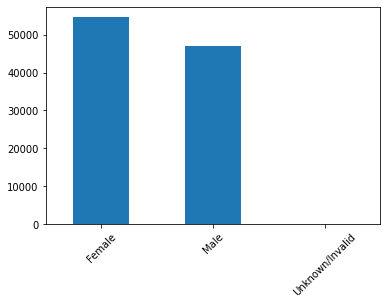

In [4]:
df["gender"].value_counts().plot(kind='bar', rot=45);

#### Sample Sizes for Gender (Frequencies)

In [5]:
df["gender"].value_counts(normalize=True)

Female            0.538
Male              0.462
Unknown/Invalid   0.000
Name: gender, dtype: float64

### Fairness Considerations

Small sample sizes have two implications:
* **Training**: Fewer training samples may result in the model failing to learn patterns related to smaller groups, which means that its predictive performance on these groups could be worse.
* **Assessment**: Fewer data points overall may mean a much larger uncertainty (error bars) in model estimates, making the impacts of the system on smaller groups harder to assess. 

### Exercise

Write code to **print** and **plot** the sample sizes of the **race** demographic group using either counts or frequencies.

### Your Solution

In [17]:
# Print Dataframe of Sample Sizes for Given Demographic
df["gender"].value_counts(normalize=True)

Female            0.538
Male              0.462
Unknown/Invalid   0.000
Name: gender, dtype: float64

<AxesSubplot:>

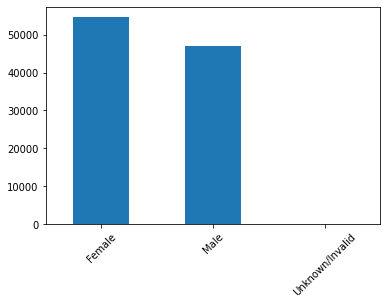

In [18]:
# Plot Dataframe Showing Sample Sizes for Given Demographic
df["gender"].value_counts().plot(kind='bar', rot=45)

### Sample Sizes Discussion

What are your thoughts on the distribution for race?  

Modify your code above so that you can examine sample sizes for age instead of race.   
What risks if any are associated with age?  

Using a scale of _high_, _medium_, _low_, rate the risks associated with each feature as pertains to sample sizes? 

### Mitigating the Risks of Small Sample Size

When the data set lacks coverage of certain groups, it means that you won't be able to reliably assess any fairness-related issues. There are three possible interventions, which can be combined if needed. These are:

* **Collecting**: gather more data for groups with fewer samples.
* **Pooling**: merge some of the groups with fewer samples together to make a larger group.
* **Dropping**: removing some of the group with fewer samples altogether (extra caution).

The choice of strategy depends on your existing understanding of which groups are at the greatest risk of harm. Pooling the groups with widely different risks could mask the extent of harms. You should be extra  cautious against dropping small groups completely as this may leads to the representational harm of erasure. If any groups are merged or removed, these decisions should be annotated and explained. Experimentation is also a useful tool in your toolbelt, so I recommend to approach these issues as both a scientist and a software engineer/tester. For the previous exercise, the recommendations are:

* Drop the gender group labeled *Unknown/Invalid* because the sample size is so small that no meaningful fairness assessment is possible.

* Merge the three smallest race groups *Asian*, *Hispanic*, *Other*, but also retain the original groups for auxiliary assessments. 

Here is the code that implements these recommendations:

In [ ]:
# drop gender group Unknown/Invalid
df = df.query("gender != 'Unknown/Invalid'")

# retain the original race as race_all, and merge Asian+Hispanic+Other 
df["race_all"] = df["race"]
df["race"] = df["race"].replace({"Asian": "Other", "Hispanic": "Other"})

## Hands-On with Testing Fairness in Model Training: Label Choice

Before you can adequately evaluate the care program recommendation model for fairness, you must check whether the choice of classification label, **readmission within 30 days**, aligns with the expectations that the system shall **identify patients that would benefit** from the care management program. In other words, the following assumption was made during model development: 

>The **greatest benefit** from the care management program **would go to patients most likely to be readmitted** within 30 days. 

Now you need to test that assumption!  

### Task Description

Formally stated, the task is to investigate whether the selected measurement `readmit_30_days` correlates with patient characteristics that support the construct **benefit from care management**. One such characteristic is general patient health, where it is reasonable to expect that patients that are less healthy, are more likely to benefit from care management. Although the dataset does not contain full health records for measuring general patient health, it does contain two relevant features on a patient's health during the preceding year.  These are:

* `had_emergency`: indicates whether the patient spent any days in the hospital's emergency room. 
* `had_inpatient_days`: indicates whether the patient spent any days in the hospital that were non-emergency.

To test the validity of the classification (output) label, you'll want to check that `readmit_30_days` is predictive of the two observable characteristics `had_emergency` and `had_inpatient_days`.

### Setup

#### Import and Configure Libraries

In [ ]:
# Data Processing: numpy, pandas
import numpy as np
import pandas as pd
pd.set_option("display.float_format", "{:.3f}".format)

# Plotting: seaborn
import seaborn as sns
sns.set()

#### Load the Dataset

In [ ]:
df = pd.read_csv("../data/diabetic_preprocessed.csv")
df.head()

###  Interactive Demo

Start by examining the rate at which patients with different `readmit_30_days` labels were readmitted in the previous year

In [ ]:
# Plot showing how predictive readmit_30_days is of had_emergency
sns.pointplot(y="had_emergency", x="readmit_30_days",
              data=df, ci=95, join=False);

The plot shows that patients with `readmit_30_days=0` have a lower rate of emergency visits in the prior year, whereas patients with `readmit_30_days=1` have a larger rate. The vertical lines indicate 95% confidence intervals obtained via a method called [bootstrapping](https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/).

Now look at how `readmit_30_days` performs when predicting the rate of (non-emergency) hospital visits in the previous year:

In [ ]:
# Write code to plot how predictive readmit_30_days is of had_inpatient_days
sns.pointplot(y="had_inpatient_days", x="readmit_30_days",
              data=df, join=False);

Do you see a similar pattern when `readmit_30_days` is used to predict the rate of non-emergency hospital visits when compared to emergency visits? If so, great! However, the test isn't over yet as you still have to consider fairness. 

### Fairness Considerations
Although the predictiveness of the model may be valid overall, it does necessarily mean that it is similar across different groups. To gain insights on the predictiveness across groups you can use create a categorical pointplot using Seaborn. Here is an example that visualizes the `readmit_30` label's predictiveness of `had_emergency` and `had_inpatient_days` across **race**:

In [ ]:
# Visualize predictiveness using a categorical pointplot
sns.catplot(y="had_emergency", x="readmit_30_days", hue="race", data=df,
            kind="point", ci=95, dodge=True, join=False);

sns.catplot(y="had_inpatient_days", x="readmit_30_days", hue="race", data=df,
            kind="point", ci=95, dodge=True, join=False);

### Exercise

Check the model's predictive validity with respect to `gender` and `age`. Create visuals to help with your analysis.

### Your Solution

In [ ]:
# Categorical pointplots showing `readmit_30` predictiveness of `had_emergency` and `had_inpatient_days` with respect to `gender`

# Categorical pointplots showing `readmit_30' predictiveness of and `age` `had_emergency` and `had_inpatient_days` with respect to `gender`

### Discussion

Do you see any differences between the two sets of visualization results?  

If there's a difference, can you form a hypothesis about why it may be occuring?

## Hands-On with Fairness Toolkits: Measuring Fairness Risks with Fairlearn

Google, Microsoft and IBM are all investing in AI fairness toolkits. The tools in these toolkits generally provide support for:
* Visually probing datasets and the output of your ML models 
* Detecting and mitigating fairness-related risks
* Understanding any trade-offs between fairness and performance.

### [Fairlearn](https://fairlearn.org)

It's time for hands-on practice using one such toolkit &mdash; **Fairlearn**.  The Fairlearn project originally started in 2018 at Microsoft Research, but since 2021 has adopted a neutral governance structure and is now completely community-driven. 

### <a id='fairness_toolkit_setup'>Setup</a>

#### <a id='fairness_toolkit_setup_import'>Import and Configure Libraries</a>

In [ ]:
# Data Processing: Numpy, Pandas, Scikit-learn

import numpy as np
import pandas as pd
pd.set_option("display.float_format", "{:.3f}".format)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils import Bunch
from sklearn.metrics import (
    balanced_accuracy_score,
    roc_auc_score,
    accuracy_score,
    recall_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    plot_roc_curve)
from sklearn import set_config
set_config(display="diagram")

In [ ]:
# Plotting: Seaborn, Matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# AI Fairness: Fairlearn

from fairlearn.metrics import (
    MetricFrame,
    true_positive_rate,
    false_positive_rate,
    false_negative_rate,
    selection_rate,
    count,
    false_negative_rate_difference
)

from fairlearn.postprocessing import ThresholdOptimizer, plot_threshold_optimizer
from fairlearn.postprocessing._interpolated_thresholder import InterpolatedThresholder
from fairlearn.postprocessing._threshold_operation import ThresholdOperation
from fairlearn.reductions import ExponentiatedGradient, EqualizedOdds, TruePositiveRateParity

In [ ]:
from IPython import display
from datetime import date

#### <a id='fairness_toolkit_setup_data'>Prepare Training and Test Data</a>

In [ ]:
# Load the Dataset
df = pd.read_csv("../data/diabetic_preprocessed.csv")
df.head()

In [ ]:
# Mark all the category features
categorical_features = [
    "race",
    "gender",
    "age",
    "discharge_disposition_id",
    "admission_source_id",
    "medical_specialty",
    "primary_diagnosis",
    "max_glu_serum",
    "A1Cresult",
    "insulin",
    "change",
    "diabetesMed",
    "readmitted"
]

In [ ]:
for col_name in categorical_features:
  df[col_name] = df[col_name].astype("category")

In [ ]:
# drop gender group Unknown/Invalid
df = df.query("gender != 'Unknown/Invalid'")

# retain the original race as race_all, and merge Asian+Hispanic+Other 
df["race_all"] = df["race"]
df["race"] = df["race"].replace({"Asian": "Other", "Hispanic": "Other"})

In [ ]:
# Target variable is readmission within 30 days, and sensitive feature for fairness assessment is race.
target_variable = "readmit_30_days"
demographic = ["race", "gender"]
sensitive = ["race"]

# If multiple sensitive features are chosen, the rest of the script considers intersectional groups.
Y, A = df.loc[:, target_variable], df.loc[:, sensitive]

In [ ]:
# Drop the features that won't be used and expand the categorical features into 0/1 indicators ("dummies")
X = pd.get_dummies(df.drop(columns=[
    "race",
    "race_all",
    "discharge_disposition_id",
    "readmitted",
    "readmit_binary",
    "readmit_30_days"
]))

X.head() # sanity check

In [ ]:
random_seed = 445
np.random.seed(random_seed)

In [ ]:
X_train, X_test, Y_train, Y_test, A_train, A_test, df_train, df_test = train_test_split(
    X,
    Y,
    A,
    df,
    test_size=0.50,
    stratify=Y,
    random_state=random_seed
)

In [ ]:
def resample_dataset(X_train, Y_train, A_train):

  negative_ids = Y_train[Y_train == 0].index
  positive_ids = Y_train[Y_train == 1].index
  balanced_ids = positive_ids.union(np.random.choice(a=negative_ids, size=len(positive_ids)))

  X_train = X_train.loc[balanced_ids, :]
  Y_train = Y_train.loc[balanced_ids]
  A_train = A_train.loc[balanced_ids, :]
  return X_train, Y_train, A_train

In [ ]:
X_train_bal, Y_train_bal, A_train_bal = resample_dataset(X_train, Y_train, A_train)

#### Train the Model using the Training Set

In [ ]:
unmitigated_pipeline = Pipeline(steps=[
    ("preprocessing", StandardScaler()),
    ("logistic_regression", LogisticRegression(max_iter=1000))
])

In [ ]:
unmitigated_pipeline.fit(X_train_bal, Y_train_bal)

In [ ]:
Y_pred_proba = unmitigated_pipeline.predict_proba(X_test)[:,1]
Y_pred = unmitigated_pipeline.predict(X_test)

#### Check Model Performance on Test Set

In [ ]:
# Plot ROC curve of probabilistic predictions
plot_roc_curve(unmitigated_pipeline, X_test, Y_test);

In [ ]:
# Show balanced accuracy rate of the 0/1 predictions
balanced_accuracy_score(Y_test, Y_pred)

### Task Description

Conduct a **fairness assessment on the ML-based care program recommendation system** described in the scenario. To keep the task manageable, the scope of the assessment can be limited to identifying and quantifying fairness-related risks for one group that might be harmed by the system.

### Walkthrough

Recall that the steps in assessing fairness are: identify risks (potential harm), determine which groups might be impacted, quantify risks and compare quantified risks across groups. In this section, I'll walk you through each of these steps and make concrete choices on various aspects of the assessment, so that you can see what is necessary to complete the task.  Immediately afterwards, you'll get hands-on practice using Fairlearn to support these activities.

#### Risks
For the healthcare scenario, the patients that would benefit from the care management program, but are not recommended for it, experience **allocation harm**. In the context of the trained classifier, these are any **false negative** results. 

#### Potentially Impacted Groups
When assessing fairness you should consider demographics, including historically marginalized groups like those based on gender, race and ethnicity. It is also important to consider group intersections, e.g., Black Latin Women. This demonstration will focus on groups defmined by **race**.

#### Quantified Risks
Two metrics will be used for quantifying fairness-related risks:

* **False Negative Rate**: Fraction of patients that are readmitted within 30 days, but that are not recommended for the care management program; this quantifies harm.

* **Selection Rate**: Fraction of patients that are recommended for the care management program regardless of whether they are readmittted with 30 days or not. Technically, as stated, this quantifies a benefit. However, the assumption is that all patients should benefit similarly from the extra care, but if that does not happen it represents a fairness-related risk.

#### Risk Comparison Across Groups
The workhorse of fairness assessment are _disaggregated metrics_, which are **metrics evaluated on slices of data**. For example, to measure harms due to errors, you would begin by evaluating the errors on each slice of the data that corresponds to potentially impacted groups. If some of the groups are seeing much larger errors than other groups, flag this as a fairness harm.

To summarize the disparities in errors, or other metrics, you may want to report quantities such as the **difference** or **ratio** of the metric values between the best and the worst slices. In settings where the goal is to guarantee certain minimum quality of service, it is also meaningful to report the **worst performance** across all considered groups. For example, when comparing false negative rate across groups defined by race, the findings can be summarized in a table like this one:

| | false negative rate<br>(FNR) |
|---|---|
| AfricanAmerican | 0.43 |
| Caucasian | 0.44 |
| Other | 0.52 |
| Unknown | 0.67 |
| | |
|_largest difference_| 0.24 &nbsp;&nbsp;(best is 0.0)|
|_smallest ratio_| 0.64 &nbsp;&nbsp;(best is 1.0)|
|_maximum_<br>_(worst-case) FNR_|0.67|


### Interactive Demo

Fairlearn provides the data structure called `MetricFrame` to enable evaluation of disaggregated metrics. In this interactive hands-on demo, you'll learn how to use the `MetricFrame` object to assess fairness-related risks in a trained `LogisticRegression` classifier for the scenario.

**Reminder**: Make sure you have run all the steps in the [Setup section](#fairness_toolkit_setup) before proceeding with this demo. 

#### Using MetricFrame
In its simplest form MetricFrame takes four arguments:  

* A metrics function: `metric_function(y_true, y_pred)`
* An array of labels: `y_true`
* An array of predictions: `y_pred`
* An array of sensitive features: `sensitive_features`


In [ ]:
mf1 = MetricFrame(metrics=false_negative_rate,
                  y_true=Y_test,
                  y_pred=Y_pred,
                  sensitive_features=df_test['race'])  

#### Accessing the Metrics in MetricFrame

Any **disaggregated metrics** are stored in a Pandas Series `mf1.by_group`:

In [ ]:
mf1.by_group

The **largest difference**, **smallest ratio** and **worst-case performance** are accessed as:

* `mf1.difference()`
* `mf1.ratio()`
* `mf1.group_max()`

In [ ]:
print(f"difference: {mf1.difference():.3}\n"
      f"ratio: {mf1.ratio():.3}\n"
      f"max across groups: {mf1.group_max():.3}")

You can also **evaluate multiple metrics** by providing a dictionary:

In [ ]:
metrics_dict = {
    "selection_rate": selection_rate,
    "false_negative_rate": false_negative_rate,
    "balanced_accuracy": balanced_accuracy_score,
}

metricframe_unmitigated = MetricFrame(metrics=metrics_dict,
                  y_true=Y_test,
                  y_pred=Y_pred,
                  sensitive_features=df_test['race'])

After which, the disaggregated metrics are stored in a pandas DataFrame:

In [ ]:
metricframe_unmitigated.by_group

And the largest difference, smallest ratio, and the maximum and minimum **values across the groups** are then all pandas Series:

In [ ]:
metricframe_unmitigated.difference()

You can view them transposed as follows:

In [ ]:
pd.DataFrame({'difference': metricframe_unmitigated.difference(),
              'ratio': metricframe_unmitigated.ratio(),
              'group_min': metricframe_unmitigated.group_min(),
              'group_max': metricframe_unmitigated.group_max()}).T

You can also easily plot all of the metrics using DataFrame plotting capabilities:

In [ ]:
metricframe_unmitigated.by_group.plot.bar(subplots=True, layout= [1,3], figsize=(12, 4),
                      legend=False, rot=-45, position=1.5);

#### Analyzing the Results

Now the fun part. Analyzing the fairness measurements produced by Fairlearn or your toolkit of choice. Here's the analysis for the healthcare scenario:
>According to the above bar chart, it appears that the group *Unknown* is selected for the care management program less often than other groups as reflected by the selection rate. Also this group experiences the largest false negative rate, so a larger fraction of group members that are likely to benefit from the care management program are not selected. Finally, the balanced accuracy on this group is also the lowest.

In other words, there seems to be disparity. But why? There's a variety of reasons why such disparities may occur:
* **Representational issues**: not enough instances per group
* **Feature distribution differs across groups**: differences in the relationship between features and target variable

Real-world applications often exhibit both kinds of issues at the same time. The key takeaway is that by measuring fairness using tools like Fairlearn you can identify such disparities and determine whether or not they pose a serious risk to the project.  If they do, you'll want to employ some sort of mitigation strategy reduce the likelihood and/or severity of fairness-related harm.

### Exercise

In this exercise you'll be training your own model and evaluating it for fairness-related risks using `MetricFrame`.  I encourage you to explore the model's performance across different sensitive features, such as `age` or `gender`, as well as different model performance metrics. A gentle reminder that if you jumped straight to this exercise, you'll want to run the [import and configure libraries](#fairness_toolkit_setup_import) and [prepare training and test data](#fairness_toolkit_setup_data) sections before you begin. 

#### **Step 1** - Train a `HistGradientBoostingClassifier`, and fit it to the balanced training set.

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

# Create your model here
clf = HistGradientBoostingClassifier()

# Fit the model to the training data
clf.fit(__________, ________)
exercise_pred = clf.predict(______)

#### **Step 2** - Evaluate the fairness of the model using `MetricFrame`. 

First, define a `MetricFrame` that looks at the following metrics:
*   **Count**: The number of data points belonging to each sensitive feature category.
*   **False Positive Rate**:  False Negatives / (False Negatives + False Positives)

*  **Recall Score**: True Positives / (True Positives + False Negatives)

As an extra challenge, you can use the prediction probabilities to compute the **ROC AUC Score** for each sensitive group pair. If you need a refresher on how to computer these metrics please see the [INSERT LINK TO MODEL PERFORMANCE NOTEBOOK](#link)

In [ ]:
# Define exercise fairness metrics of interest here
exercise_metrics = {
    "count": count,
    "false_positive_rate": _______,
    "recall_score": _______
}

Now, create the `MetricFrame` using the metrics listed above with the sensitive groups of `race` and `gender`.

In [ ]:
metricframe_exercise = MetricFrame(
    metrics=__________,
    y_true=Y_test,
    y_pred=__________,
    sensitive_features=_____
)

#### **Step 3** - Explore and play around with the plotting capabilities of the `MetricFrame`.

In [ ]:
# Plot some of the performance disparities here
metricframe_exercise.by_group.____.bar(subplots=_____, layout=[1,3], figsize=(12, 4),
                                       legend=False, rot=-45, position=1.5)

Note that the charts above are based on test data, so without any uncertainty quantification like error bars or confidence intervals, you cannot reliably compare these statistics. 

### [OPTIONAL] Challenge Exercise

Although it is not covered in this notebook, it is possible to augment `MetricFrame` with a report of error bars so that you can make reliable statistical comparisons.  Feel free to use the space below to complete this task as an optional challenge exercise. I've left a few hints to help you out, but remember, there's usually more than one solution to any given problem.

In [ ]:
# Challenge: Augment MetricFrame with Error Bars or Convidence Intervals

# Hint 1:
# - Define new custom metrics that quantify errors in your estimates of selection rate, 
#   false negative rate, balanced accuracy and review the measures again.


# Hint 2:
# - Create a metric frame that includes the sample sizes and error bar sizes in addition 
#   to the metrics that you had used previously.



# Hint 3:
# - Visualize the metrics with the corresponding error bars using a custom plotting function.


## Hands-On with Fairness Toolkits: Mitigating Fairness Risks with AI Fairness 360

### [AI Fairness 360](https://aif360.mybluemix.net/)

AI Fairness 360 (AIF360) is an extensible open source toolkit that can help you examine, report, and mitigate fairness-related risks, referred to as **bias** on their site, in ML models. AI Fairness 360 was created by IBM Research and donated by IBM to the Linux Foundation AI & Data.

AIF360 includes a [Python package](https://pypi.org/project/aif360/) that has a comprehensive set of metrics for datasets and models to test for biases, explanations for these metrics, and algorithms to mitigate bias in datasets and models. 

### Task Description and Interactive Demo

Since you have already explored the Python library for Fairlearn, in this hands-on task you'll interact with the AI Fairness 360 toolkit via a web-based demo.

<img style="align: center; margin: 15px 15px 15px 15px; border:1px solid black;"  src="img/aif360.gif" width="800"/>

##### **Step 1.** Navigate to the [AIF360 Interactive Demo](https://aif360.mybluemix.net/data) website.

##### **Step 2.** Walk through the process and apply mitigation strategies to different datasets. 

### Discussion

What are your thoughts on some of the different mitigation strategies and the visualizations?
* **Reweighing**: modifies the weights of different training examples
* **Optimized Pre-Processing**: modifies training data labels and features
* **Adversarial Debiasing**: leverages models that compete with each other
* **Reject Option-Based Classification**: changes predictions from a classifier to make them fairer